### TensorFlow(백터가 흐른다) = Tensor(벡터) + Flow(흐른다) 
#### Open source platform for Machine Learning   
- Google이 주도적으로 개발 
- keras 라고 하는 고수준 API를 병합  (Deep learning 의 기초 feat. Keras)

### intro에서 설명했다시피 layer 즉, multiple-perceptrons like **nural net**
![Screenshot from 2025-01-15 17-20-13.png](<attachment:Screenshot from 2025-01-15 17-20-13.png>)
![Screenshot from 2025-01-15 17-21-53.png](<attachment:Screenshot from 2025-01-15 17-21-53.png>)
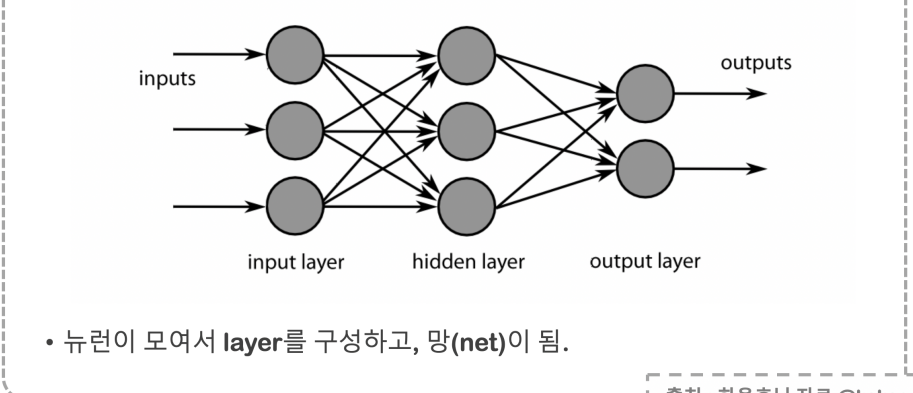
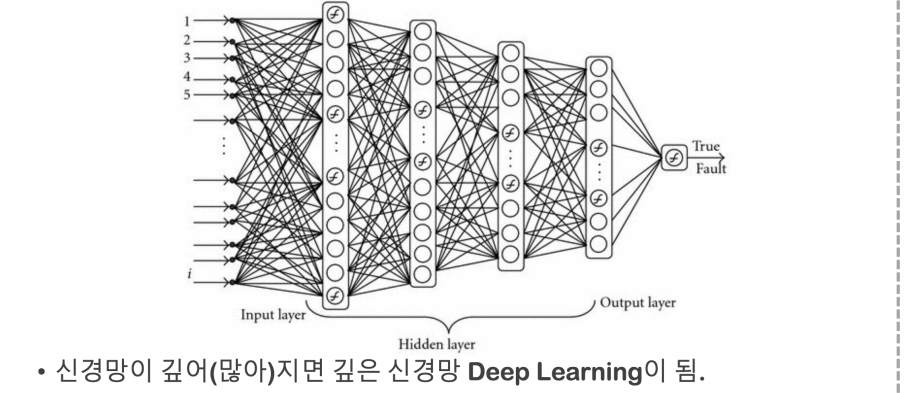

### e.g. Blood fat prediction with deep learning 

In [24]:
import numpy as np 

raw_data = np.genfromtxt('./data/x09.txt', skip_header=36)
raw_data 
# column 0: index 
# column 1: separator 
# column 2: the weight
# column 3: the age 
# column 4: the blood fat content

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

## GOAL: 주어진 데이터 age weight를 바탕으로 blood fat을 예측하자 

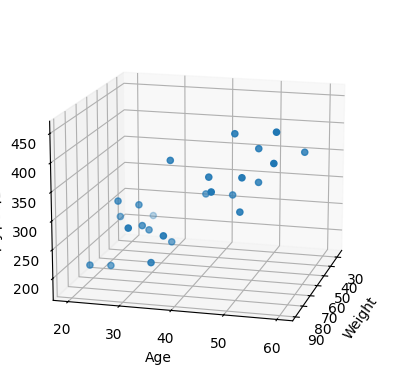

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
%matplotlib inline 

xs = np.array(raw_data[:, 2], dtype=np.float32) # the weight
ys = np.array(raw_data[:, 3], dtype=np.float32) # the age 
zs = np.array(raw_data[:, 4], dtype=np.float32) # the blood fat 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)

ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')

ax.view_init(15, 15)
plt.show()

#### 모델(W, b)을 이용해서, 질문 -> e.g. age 40, weight 80인 사람의 Blood fat?
![Screenshot from 2025-01-15 17-46-02.png](<attachment:Screenshot from 2025-01-15 17-46-02.png>)
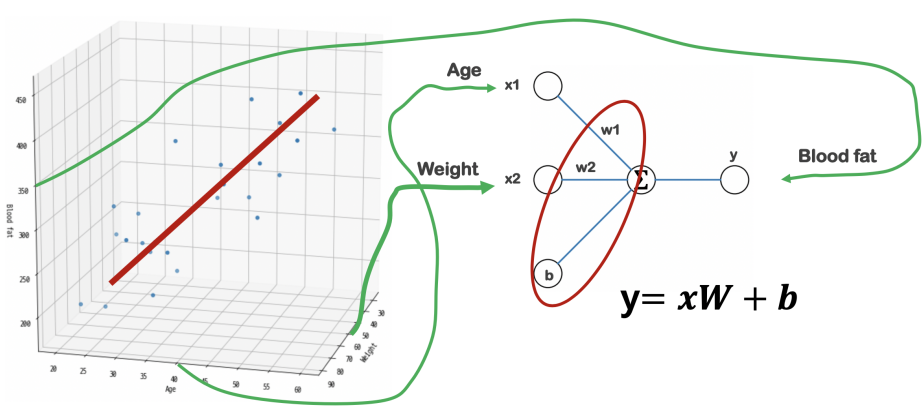

### Weight 와 bias를 구하자 

In [26]:
# 학습 대상 데이터를 추린다
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

y_data = y_data.reshape( (25,1) )

#### loss 
- 학습을 위해서는 loss(cost) 함수를 정해주어야 함 
- loss 함수 = 정답까지 얼마나 멀리 있는지를 측정하는 함수 
- mse: mean square error 오차 제곱의 평균을 사용 -> (실제값 - 예측값)^2 / 크기
#### optimizer 
- loss를 어떻게 줄일 것인지를 결정하는 방법 
-  RMSProp(Root Mean Sqaure Propagation) 사용 
![Screenshot from 2025-01-15 19-48-19.png](<attachment:Screenshot from 2025-01-15 19-48-19.png>)
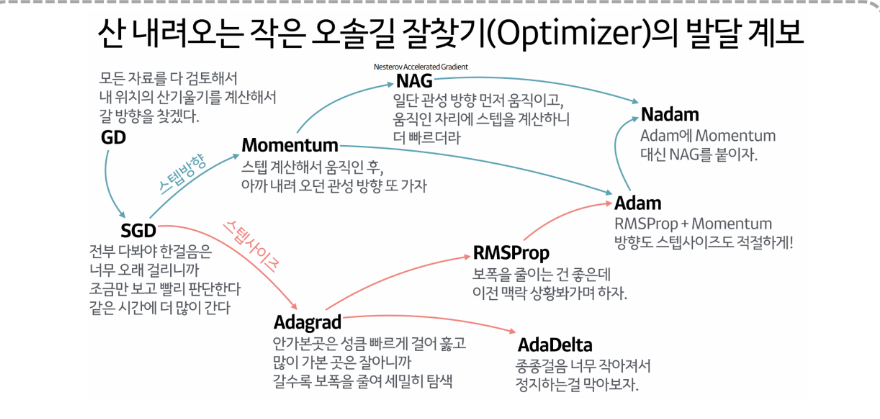

In [27]:
import tensorflow as tf

# 원래 의도한 모델은..? 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, ))    
])

model.compile(optimizer = 'rmsprop', loss='mse')

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

#### 앞의 model을 그래프로 나타내면  
![Screenshot from 2025-01-15 20-47-40.png](<attachment:Screenshot from 2025-01-15 20-47-40.png>)
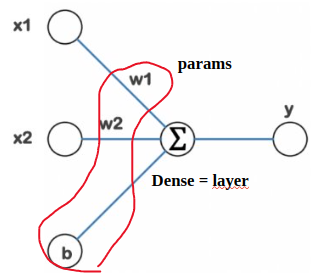

# 현재 위치
- Blood fat을 추정하는 모델 만드려고함 
- 학습을 통해 얻으려고 함 
- 이를 위해 모델을 구성했음 
- 모델의 loss function을 선정하고, loss의 감소를 위한 optimizer도 선정 

### 이제 학습만 남았음 ㅎㅎ
 

In [29]:
## fit을 통해 학습한다 
hist = model.fit(x_data, y_data, epochs=5000)   # one full iteration over the entire dataset (몇바퀴? 5000바퀴 ㄷㄷ)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 72083.2656
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71899.4141
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71766.2500
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71654.9062
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71556.1719
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71465.7734
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 71381.3125
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71301.3516
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 71224.8672
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 71151.1719
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 71079.7578
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 71010.2266
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 70942.2656
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 70875.6328
Epoch 15/5000


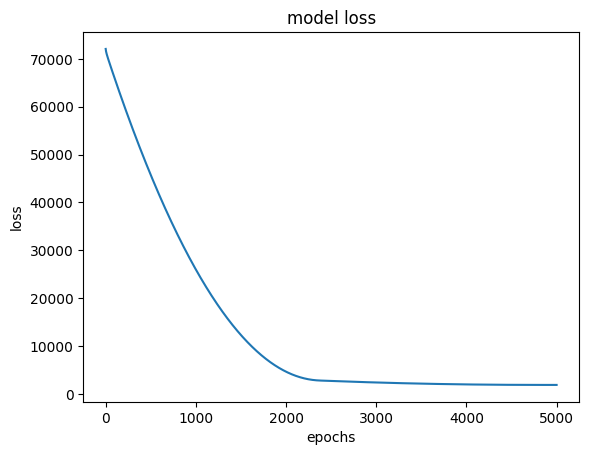

In [30]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

### 그래프로 나타내면 아마 매 sprint마다 loss가 잘 떨어질거임. 근데 3000부터 일정함 ;;
#### 몸무게 100kg에 나이 44살의 Blood Fat은 ? 

In [31]:
model.predict(np.array([100, 44]).reshape(1,2) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[375.02042]], dtype=float32)

#### 몸무게 60kg에 나이 25살의 Blood Fat은 ? 

In [32]:
model.predict(np.array([60, 25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[219.19827]], dtype=float32)

#### 가중치와 bias를 알고 싶어!

In [33]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is : ', b_)


Weight is :  [[1.2492286]
 [5.571211 ]]
bias is :  [4.9643016]


#### model이 잘 만들어졌나..? 그려서 확인 

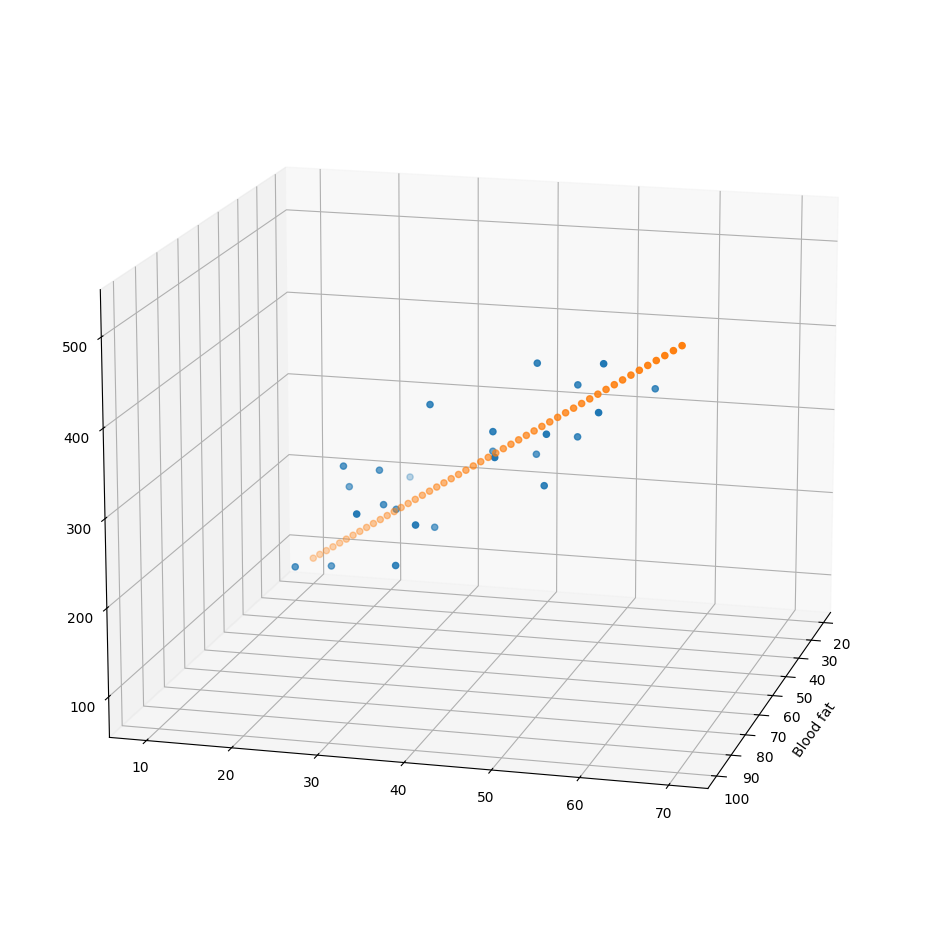

In [34]:
x = np.linspace(20, 100, 50).reshape(50, 1) # linspace from 20 to 100 총 50개 생성 50x1
y = np.linspace(10, 70, 50).reshape(50, 1)  # linspace from 10 to 70 총 50개 생성 50x1

X = np.concatenate((x,y), axis = 1 )    # 50 x 2
Z = np.matmul(X, W_) + b_         # (50 x 2) x (2 x 1) + (1 x 1)  

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, zs)  # weight, age, blood fat 
ax.scatter(x, y, Z)     # perceptron 
ax.set_xlabel('Weight')
ax.set_xlabel('Age')
ax.set_xlabel('Blood fat')
ax.view_init(15,15)
plt.show() 

### 이전에 설명했듯이 선형모델인 단층으로는 XOR를 풀 수가 없다.
![Screenshot from 2025-01-16 10-18-42.png](<attachment:Screenshot from 2025-01-16 10-18-42.png>)
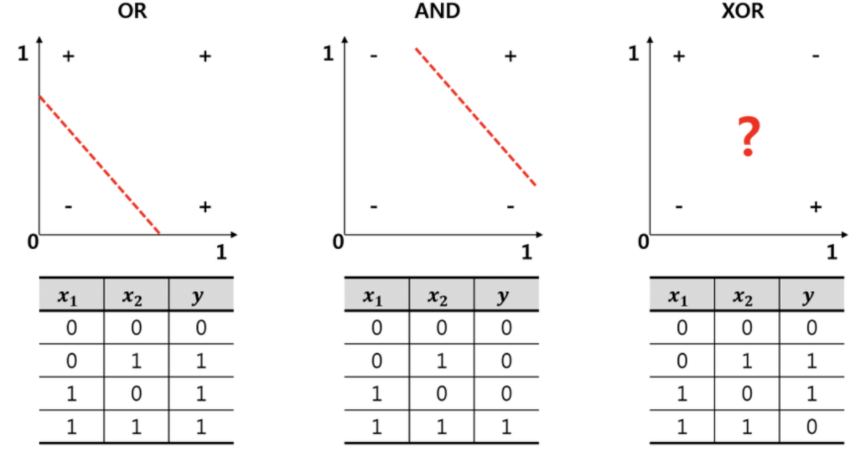

#### 그렇다면 선형모델이 아닌 비선형모델인 복층으로 해결하자 

In [35]:
import numpy as np

# 현재 data 는 XOR 연산을 모델링 
X = np.array([ [0, 0],
               [1, 0],
               [0, 1],
               [1, 1] ])
y = np.array([ [0], [1], [1], [0] ])

#  =========== model ============= 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2, ) ),  # 1층 
    tf.keras.layers.Dense(1, activation='sigmoid') # 2층 
])     # tensorflow의 deep-learning api인 keras 를 사용해서 layer을 순차적으로 쌓자 

#### 모델의 모습은 ..? 이렇게 생겼을 거임 
![Screenshot from 2025-01-16 10-53-34.png](<attachment:Screenshot from 2025-01-16 10-53-34.png>)
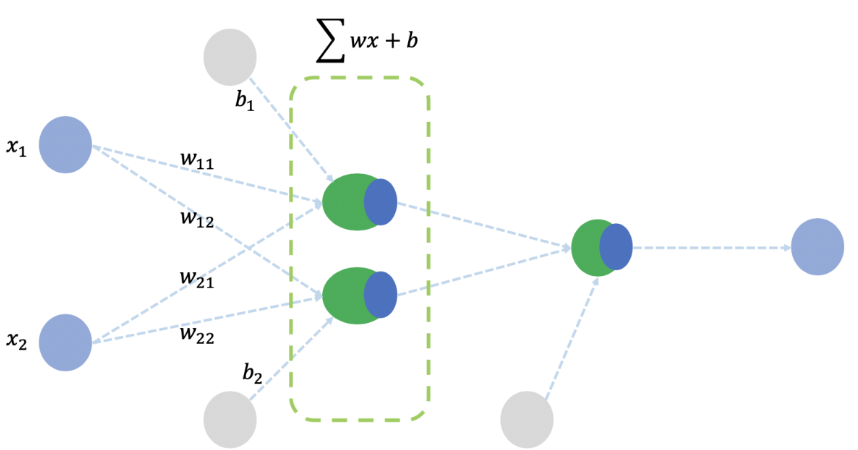

In [36]:
# optimizer: SGD 
# learning rate: 0.1 
# loss function: mse (mean squared err) 
model.compile(optimizer= tf.keras.optimizers.SGD(learning_rate= 0.1), loss='mse') 

In [37]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 학습 data는 XOR 연산 
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2856  
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2827 
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2280 
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2814 
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2574 
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2638 
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2371 
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2373 
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2765 
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2326 
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2579 
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2759 
Epoch 13/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2750 
Epoch 14/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2481
Epoch 15/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2624 
Epo

In [39]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[0.5016046 ],
       [0.5162878 ],
       [0.48459652],
       [0.49578923]], dtype=float32)

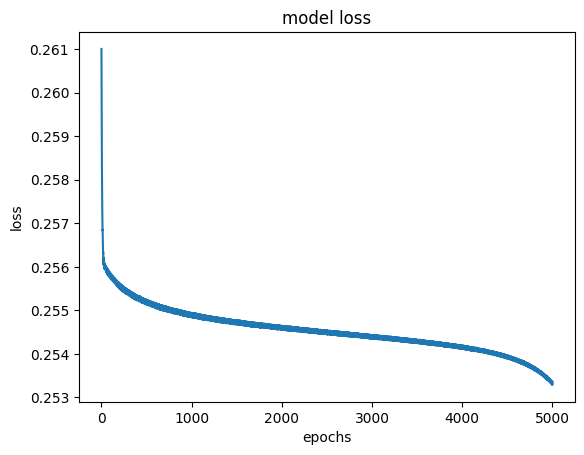

In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [42]:
for w in model.weights:
    print('---')
    print(w)

---
<Variable path=sequential_4/dense_6/kernel, shape=(2, 2), dtype=float32, value=[[-0.3062931   0.47972077]
 [ 0.23593313 -0.74126667]]>
---
<Variable path=sequential_4/dense_6/bias, shape=(2,), dtype=float32, value=[-0.20344752 -0.80947775]>
---
<Variable path=sequential_4/dense_7/kernel, shape=(2, 1), dtype=float32, value=[[-0.09208389]
 [ 0.47087   ]]>
---
<Variable path=sequential_4/dense_7/bias, shape=(1,), dtype=float32, value=[-0.09723576]>


In [ ]:
from 